In [18]:
import os
def generate_csv_classes(file_path, path_to_img, cut_factor=1):
    header = "filename,full_filename,num_class"
    data = header + "\n"
    
    timeframes = os.listdir(path_to_img)
    
    with open(file_path, "w+") as file_csv:
        for count_class, timeframe in enumerate(timeframes):
            timeframe_images_path = path_to_img + os.sep + timeframe
            images = os.listdir(timeframe_images_path)
            img_count = 0
            for image_name in images:
                img_count+=1
                if img_count % cut_factor == 0: 
                    image_index = image_name.split(".")[0]
                    image_path = timeframe_images_path + os.sep + image_name
                    count_class_this = "0" if count_class <= 16 else str(count_class-16)
                    data += "{},{},{}\n".format(image_index, image_path, count_class_this)
                
        file_csv.write(data)
CUT_FACTOR = 1
generate_csv_classes("sample_full.csv", "../resized_images", cut_factor=CUT_FACTOR)

In [19]:
import pandas as pd
df = pd.read_csv("sample_full.csv")


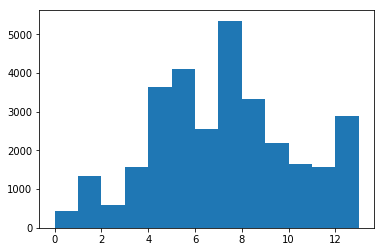

In [20]:
import matplotlib.pyplot as plt
classes_distribution = df.iloc[:, 2].values
a, b, c = plt.hist(classes_distribution, bins=list(range(14)))
plt.show()

In [17]:
# Сколько трансформированных копий нужно для каждого класса изображений, чтобы выровнять выборку
transforms = {
    0: 12,
    1: 5,
    2: 9,
    3: 4,
    4: 1,
    5: 1,
    6: 2,
    7: 1,
    8: 2,
    9: 2,
    10: 4,
    11: 4,
    12: 2
}

In [1]:
from PIL import Image

for row in df.iterrows():
    row = row[1]
    fpath = row[1]
    data = Image.open(fpath).convert("RGB")
    
    for i in range(transforms[row.iloc[2]]):
        # Поворот картинок
        if  i == 0:
            angle = 90
            data1 = data.rotate(angle)
            data1.save(fpath.split('.jpg')[0]+str(i)+'.jpg')
        if  i == 1:
            angle = 180
            data1 = data.rotate(angle)
            data1.save(fpath.split('.jpg')[0]+str(i)+'.jpg')
        if  i == 2:
            angle = 270
            data1 = data.rotate(angle)
            data1.save(fpath.split('.jpg')[0]+str(i)+'.jpg')
        # Транспонируем
        if i == 3:
            data1 = data.transpose(Image.FLIP_LEFT_RIGHT)
            data1.save(fpath.split('.jpg')[0]+str(i)+'.jpg')
        if i == 4:
            data1 = data.transpose(Image.FLIP_TOP_BOTTOM)
            data1.save(fpath.split('.jpg')[0]+str(i)+'.jpg')
        # Транспонируем и переворачиваем на 90'
        if i == 5:
            data1 = data.transpose(Image.FLIP_LEFT_RIGHT)
            angle = 90
            data1 = data1.rotate(angle)
            data1.save(fpath.split('.jpg')[0]+str(i)+'.jpg') 
        if i == 6:
            data1 = data.transpose(Image.FLIP_TOP_BOTTOM)
            angle = 90
            data1 = data1.rotate(angle)
            data1.save(fpath.split('.jpg')[0]+str(i)+'.jpg')
            
#         # Транспонируем и переворачиваем на 180'
#         if i == 7:
#             data1 = data.transpose(Image.FLIP_LEFT_RIGHT)
#             angle = 180
#             data1 = data1.rotate(angle)
#             data1.save(fpath.split('.jpg')[0]+str(i)+'.jpg') 
#         if i == 8:
#             data1 = data.transpose(Image.FLIP_TOP_BOTTOM)
#             angle = 180
#             data1 = data1.rotate(angle)
#             data1.save(fpath.split('.jpg')[0]+str(i)+'.jpg')

#         # Транспонируем и переворачиваем на 270'
#         if i == 9:
#             data1 = data.transpose(Image.FLIP_LEFT_RIGHT)
#             angle = 270
#             data1 = data1.rotate(angle)
#             data1.save(fpath.split('.jpg')[0]+str(i)+'.jpg') 
#         if i == 10:
#             data1 = data.transpose(Image.FLIP_TOP_BOTTOM)
#             angle = 270
#             data1 = data1.rotate(angle)
#             data1.save(fpath.split('.jpg')[0]+str(i)+'.jpg')
#         # Транспонируем слева-направо и сверху-вниз
#         if i == 11:
#             data1 = data.transpose(Image.FLIP_TOP_BOTTOM).transpose(Image.FLIP_LEFT_RIGHT)
#             angle = 270
#             data1 = data1.rotate(angle)
#             data1.save(fpath.split('.jpg')[0]+str(i)+'.jpg')
            
        
        
        

## Сгенерируем csv файл для новой выборки

In [21]:
generate_csv_classes("sample_full_augmentated.csv", "../resized_images_augmentated", cut_factor=CUT_FACTOR)

In [23]:

df = pd.read_csv("sample_full_augmentated.csv")

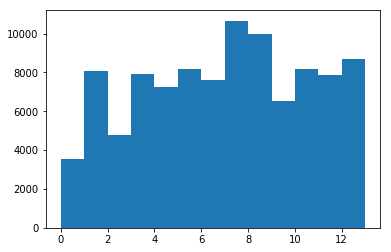

In [25]:
import matplotlib.pyplot as plt
classes_distribution = df.iloc[:, 2].values
plt.hist(classes_distribution, bins=list(range(14)))
plt.show()